# feature engineering

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

In [57]:
%store -r df

In [58]:
from sklearn.feature_selection import mutual_info_classif
target_variable = 'smoking'
features = ['age', 'relaxation', 'Gtp', 'triglyceride', 'eyesight(left)', 'ALT', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'HDL', 'hemoglobin']

# Create target variable (y) and feature matrix (X)
y = df[target_variable]
X = df[features]

# Calculate information gain
information_gain = mutual_info_classif(X, y)
feature_info_gain = pd.Series(information_gain, index=features).sort_values(ascending=False)

# Print or visualize feature importance
print(feature_info_gain)

height(cm)        0.136487
hemoglobin        0.133378
Gtp               0.104410
weight(kg)        0.081241
triglyceride      0.076252
waist(cm)         0.042750
HDL               0.041031
ALT               0.031336
age               0.025661
relaxation        0.015317
eyesight(left)    0.012534
systolic          0.009396
dtype: float64


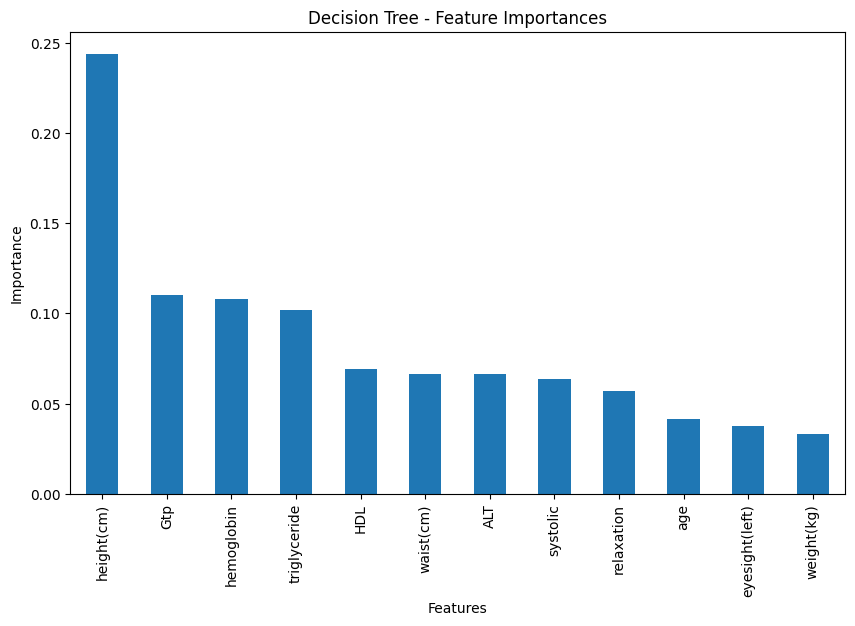

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='bar')
plt.title('Decision Tree - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

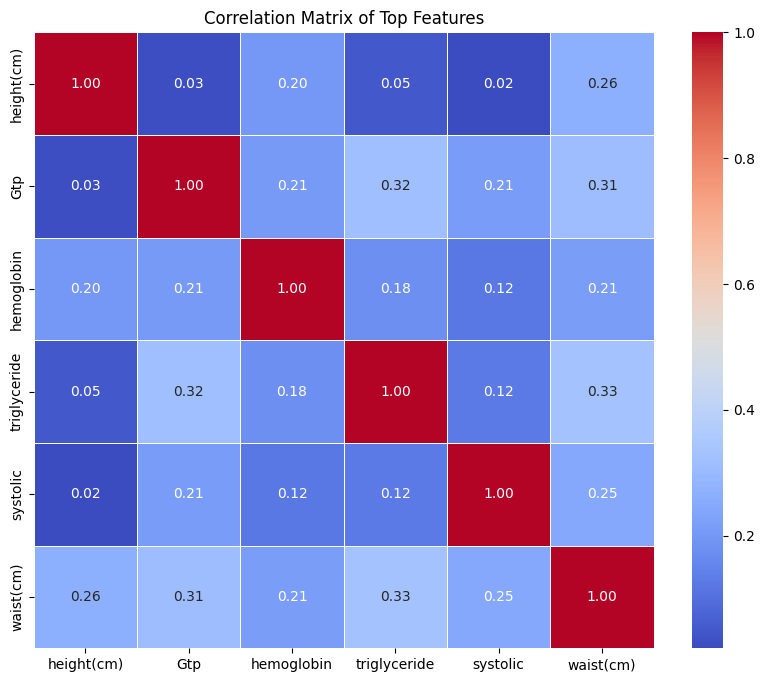

In [60]:
selected_features = ['height(cm)','Gtp', 'hemoglobin', 'triglyceride', 'systolic', 'waist(cm)']
extracted_features = df.loc[df['smoking'] == 1, selected_features].copy()
# Calculate correlation matrix
correlation_matrix = extracted_features.corr()

# Plotting the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Top Features')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 44676 entries, 2 to 101922
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   height(cm)                       44676 non-null  float64
 1   Gtp                              44676 non-null  float64
 2   hemoglobin                       44676 non-null  float64
 3   triglyceride                     44676 non-null  float64
 4   systolic                         44676 non-null  float64
 5   waist(cm)                        44676 non-null  float64
 6   systolic_waist_size_interaction  44676 non-null  float64
dtypes: float64(7)
memory usage: 2.7 MB


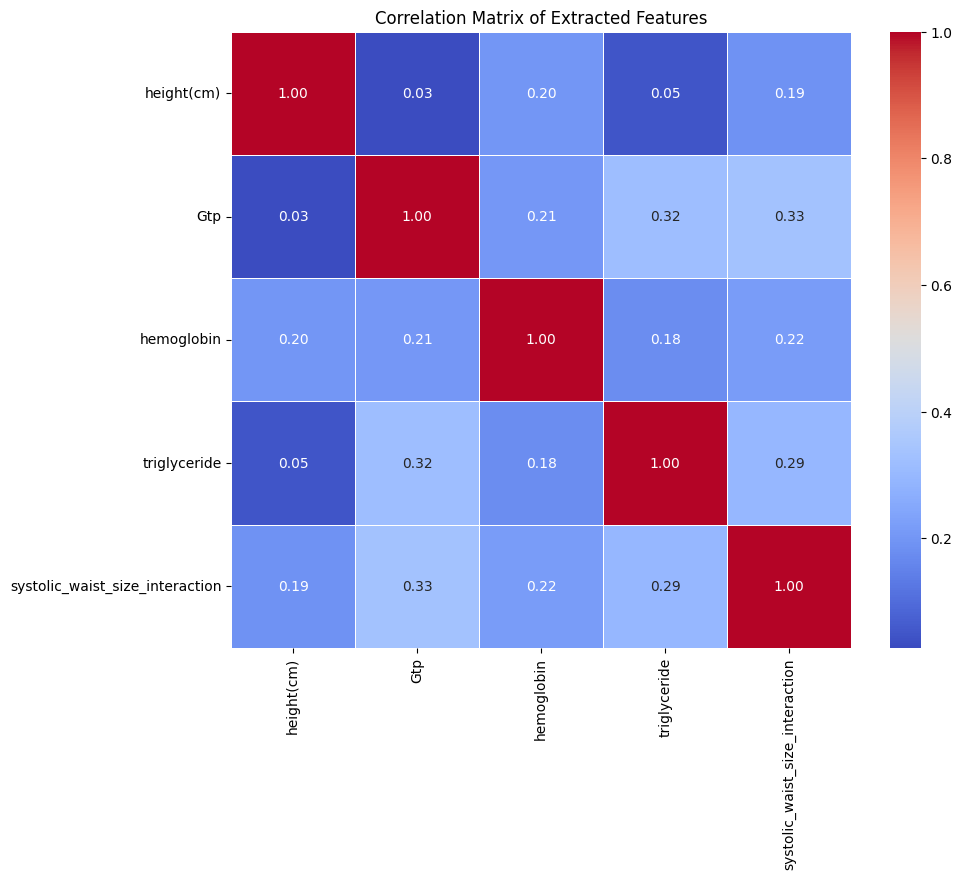

In [61]:
import seaborn as sns
extracted_features['systolic_waist_size_interaction'] = extracted_features['waist(cm)'] * extracted_features['systolic']
extracted_features.info()
extracted_features.drop(['systolic', 'waist(cm)'], axis=1, inplace=True)
correlation_matrix = extracted_features.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Extracted Features')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


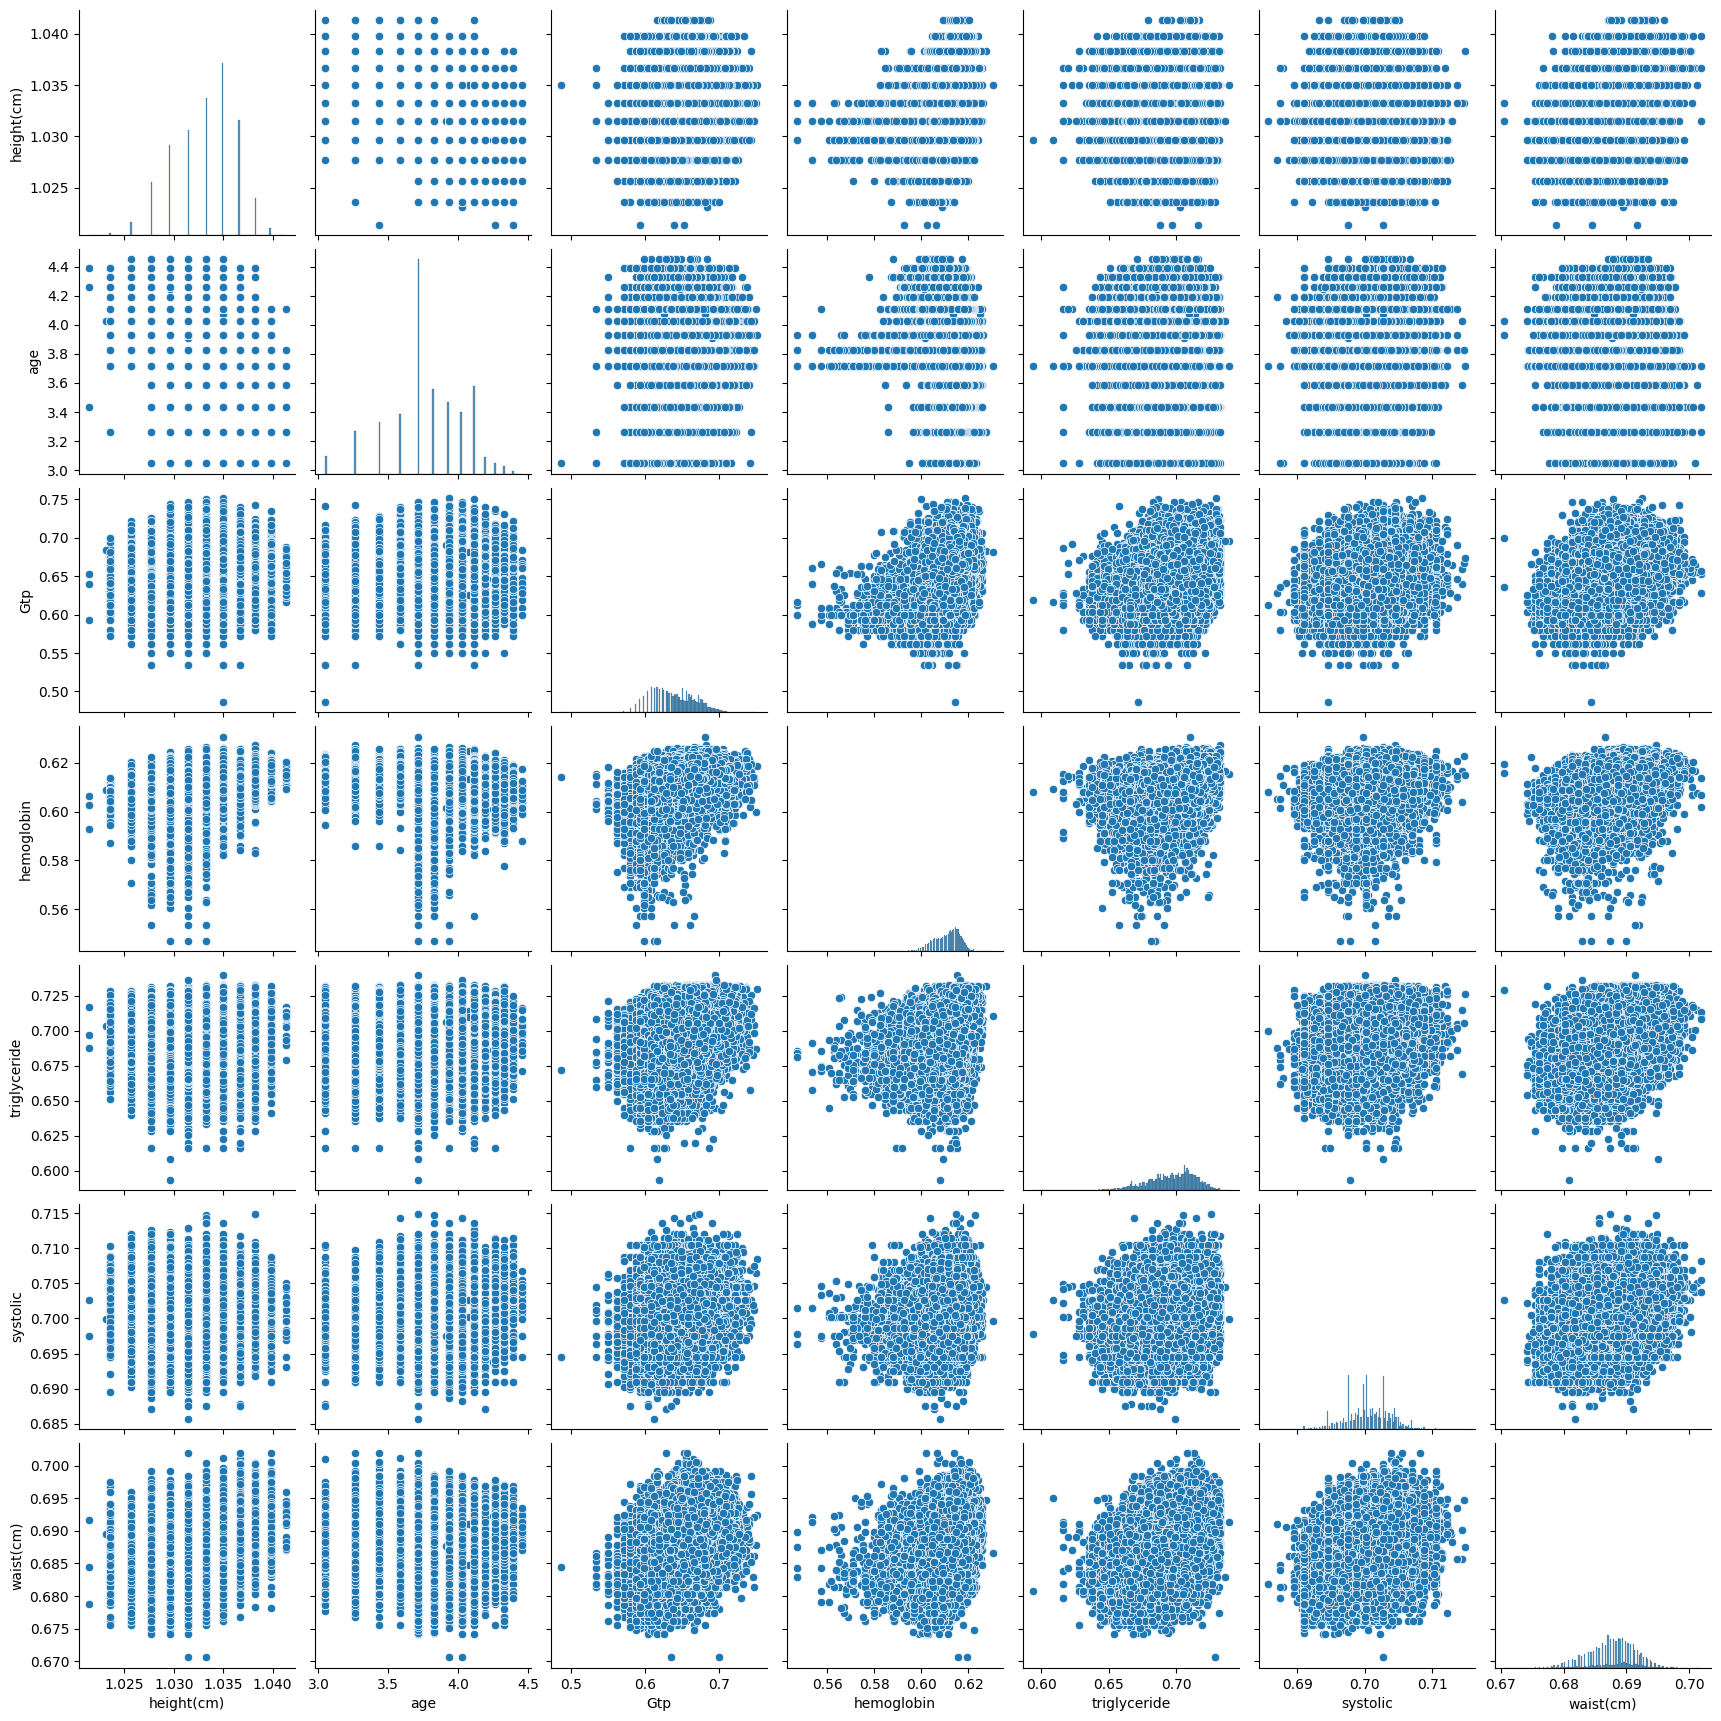

In [62]:
numeric_features = ['height(cm)','age','Gtp', 'hemoglobin', 'triglyceride', 'systolic', 'waist(cm)']
sns.pairplot(data=df[numeric_features])
plt.show()

In [63]:
skewed_features = ['height(cm)','Gtp', 'hemoglobin', 'triglyceride', 'systolic', 'waist(cm)','ALT']
df[skewed_features] = np.log1p(df[skewed_features])

In [64]:
# winsorize the data(it drops the outliers)
df['height_winsorized'] = winsorize(df['height(cm)'], limits=[0.05, 0.05])
df['waist_winsorized'] = winsorize(df['waist(cm)'], limits=[0.05, 0.05])
df['Gtp_winsorized'] = winsorize(df['Gtp'], limits=[0.05, 0.05])
df['triglyceride_winsorized'] = winsorize(df['triglyceride'], limits=[0.05, 0.05])
df['systolic_winsorized'] = winsorize(df['systolic'], limits=[0.05, 0.05])
df['hemoglobin_winsorized'] = winsorize(df['hemoglobin'], limits=[0.05, 0.05])
df['ALT_winsorized'] = winsorize(df['ALT'], limits=[0.05, 0.05])

In [65]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_features])
df_scaled = pd.DataFrame(scaled_features, columns=numeric_features)

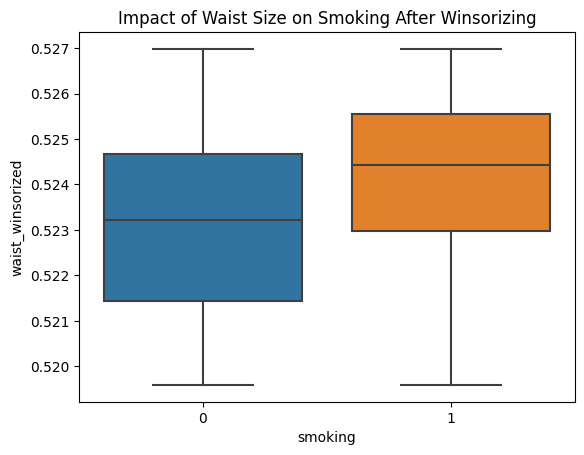

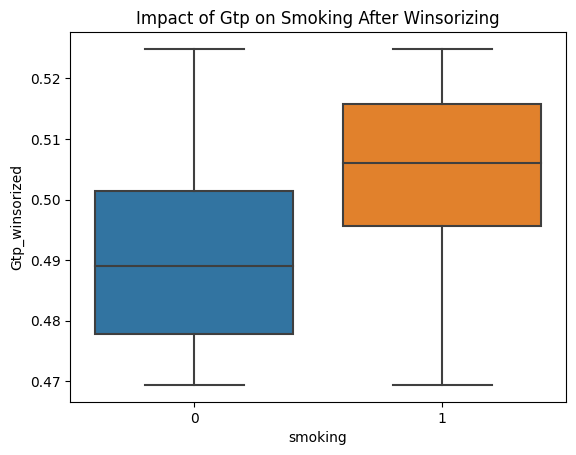

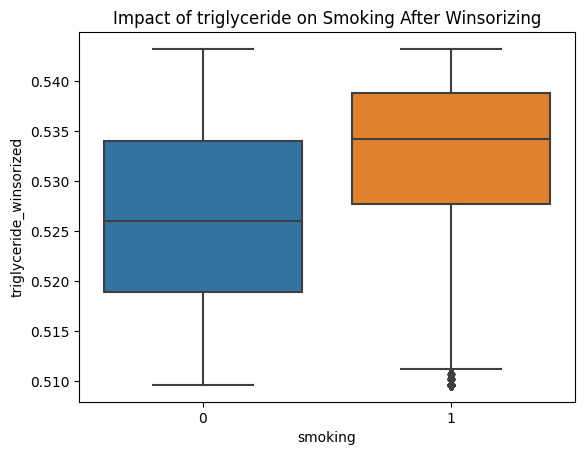

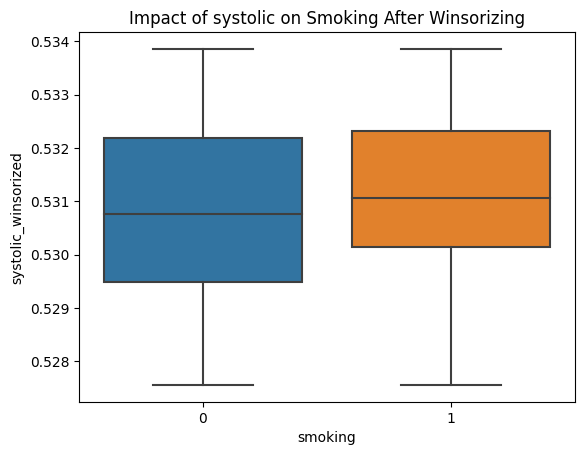

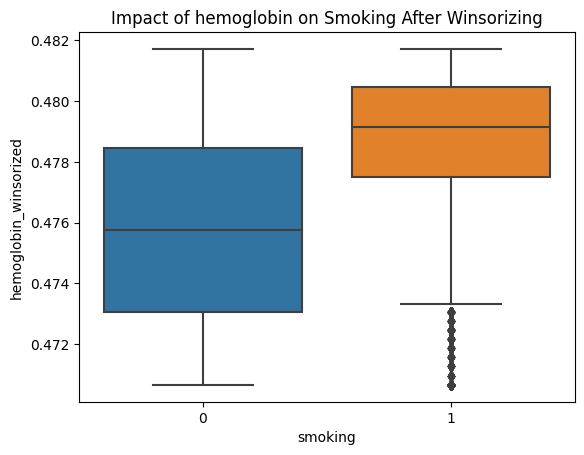

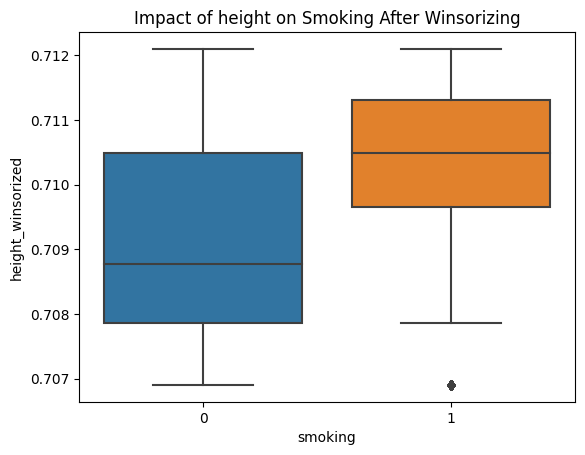

In [66]:
sns.boxplot(x='smoking', y='waist_winsorized', data=df)
plt.title('Impact of Waist Size on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='Gtp_winsorized', data=df)
plt.title('Impact of Gtp on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='triglyceride_winsorized', data=df)
plt.title('Impact of triglyceride on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='systolic_winsorized', data=df)
plt.title('Impact of systolic on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='hemoglobin_winsorized', data=df)
plt.title('Impact of hemoglobin on Smoking After Winsorizing')
plt.show()

sns.boxplot(x='smoking', y='height_winsorized', data=df)
plt.title('Impact of height on Smoking After Winsorizing')
plt.show()

In [68]:
new_def=df[['smoking','waist_winsorized','Gtp_winsorized','triglyceride_winsorized','systolic_winsorized','hemoglobin_winsorized','height_winsorized','ALT_winsorized']]
%store new_def

Stored 'new_def' (DataFrame)
